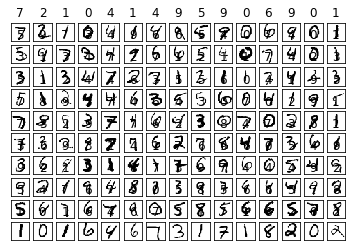

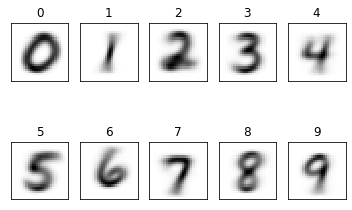

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "/content/drive/My Drive/AssignmentFolder/Assignment09/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [2]:
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training MNIST Model on {device}\n{"="*44}')

Training MNIST Model on cuda


In [0]:
#구해야 하는 label

real_label = np.zeros((10, 6000))
#label
for i in range(0, 6000):
  for j in range(0, 10):
    if j == list_label[i]:
      real_label[j][i] = 1
    else:
      real_label[j][i] = 0
      
test_real_label = np.zeros((10, 4000))
#test label
for i in range(0, 4000):
  for j in range(0, 10):
    if j == list_label[i]:
      test_real_label[j][i] = 1
    else:
      test_real_label[j][i] = 0

In [59]:
#np.random.normal() : 평균mean, 표준편차deriviation, size = (,)

#initialize + normalize
train_data = list_image[0:, 0:6000] / 255
train_bias = np.ones((1, 6000))
#input data
#size : 784, 6000
X = train_data
#X bias
Xb = train_bias
#u for input data
u_d = np.random.randn(196, 784)
#u for input bias
u_b = np.random.randn(196,1)
#hidden layer1
#size : 784, 6000
Y = np.dot(u_d, X) + np.dot(u_b, Xb)
#activate
Y_ = 1 / (1 + np.exp(-Y))
#bias
Y_b = train_bias
#v for activate data Y_
v_d = np.random.randn(49, 196)
#v for bias Y_
v_b = np.random.randn(49, 1)

#hidden layer2
#size : 49, 6000
Z = np.dot(v_d, Y_) + np.dot(v_b, Y_b)
#activate
Z_ = 1 / (1 + np.exp(-Z))
#bias
Z_b = train_bias
#w for activate data Z_
w_d = np.random.randn(10, 49)
#w for bias Z_
w_b = np.random.randn(10, 1)
#deactivate output
H = np.dot(w_d, Z_) + np.dot(w_b, Z_b)
#activate
H_ = 1 / (1 + np.exp(-H))
print(H_)

learning_rate = 0.0001

"""#label

H_L = np.zeros((10, 4000))
iter = 0
#label은 index maximum value
while iter < 4000:
  #n번째가 label이 1이다.  
  for iter0 in range(0, 10):
    if iter0 == H_[0:,iter:iter+1].argmax():
      H_L[iter0][iter] = 1
  iter += 1"""


#test_data
#initialize + normalize
test_data = list_image[0:, 0:4000] / 255
test_bias = np.ones((1, 4000))
#input data
#size : 784, 4000
test_X = test_data
#X bias
test_Xb = test_bias

#hidden layer1
#size : 784, 4000
test_Y = np.dot(u_d, test_X) + np.dot(u_b, test_Xb)
#activate
test_Y_ = 1 / (1 + np.exp(-test_Y))
#bias
test_Y_b = test_bias

#hidden layer2
#size : 49, 4000
test_Z = np.dot(v_d, test_Y_) + np.dot(v_b, test_Y_b)
#activate
test_Z_ = 1 / (1 + np.exp(-test_Z))
#bias
test_Z_b = test_bias

#deactivate output
test_H = np.dot(w_d, test_Z_) + np.dot(w_b, test_Z_b)
#activate
test_H_ = 1 / (1 + np.exp(-test_H))


[[6.00398157e-01 9.39522707e-02 5.76215471e-01 ... 2.84663818e-01
  9.93375127e-01 8.91794206e-01]
 [6.86355383e-04 3.31470108e-04 1.08439130e-05 ... 8.18306259e-04
  2.42689034e-06 4.85919801e-04]
 [9.97428899e-01 9.65815922e-01 9.84635165e-01 ... 9.98244539e-01
  9.21351843e-01 6.79893703e-01]
 ...
 [7.87428166e-01 9.47781234e-01 9.95497495e-01 ... 7.86780882e-01
  9.96355667e-01 6.12917373e-01]
 [9.37955465e-03 5.22415840e-04 9.44840050e-02 ... 2.65274377e-03
  3.56174091e-02 9.41171162e-02]
 [2.79356431e-02 1.11079567e-02 6.04032233e-02 ... 5.09495637e-02
  3.70791920e-02 1.73975735e-03]]


In [0]:
cost_list = []
test_cost_list = []
threshold = 0.0000001
pre_cost = 0
#training accuracy
training_accuracy = []
testing_accuracy = []

iter = 0

while iter < 10000:
  
  #correct accuracy
  correct = 0
  testing_correct = 0

  #cost
  J = np.mean(-1 * real_label * np.log(H_) - (1 - real_label) * np.log(1 - H_))
  cost_list.append(J)
  #gradient descent
  tmp_w_d = w_d - learning_rate * np.dot(H_ - real_label, Z_.T)
  tmp_v_d = v_d - learning_rate * np.dot(np.dot(w_d.T, H_ - real_label) * Z_ * (1 - Z_), Y_.T)
  tmp_u_d = u_d - learning_rate * np.dot( np.dot(v_d.T, np.dot(w_d.T, H_ - real_label) * Z_ * (1 - Z_)) * Y_ * (1 - Y_), X.T )
  w_d = tmp_w_d
  v_d = tmp_v_d
  u_d = tmp_u_d
  #new layers
  Y = np.dot(u_d, X) + np.dot(u_b, Xb)
  Y_ = 1 / (1 + np.exp(-Y))
  Z = np.dot(v_d, Y_) + np.dot(v_b, Y_b)
  Z_ = 1 / (1 + np.exp(-Z))
  H = np.dot(w_d, Z_) + np.dot(w_b, Z_b)
  H_ = 1 / (1 + np.exp(-H))
      
  #test cost
  J_test = np.mean(-1 * test_real_label * np.log(test_H_) - (1 - test_real_label) * np.log(1 - test_H_))
  test_cost_list.append(J_test)
  #test_new layers
  test_Y = np.dot(u_d, test_X) + np.dot(u_b, test_Xb)
  test_Y_ = 1 / (1 + np.exp(-test_Y))
  test_Z = np.dot(v_d, test_Y_) + np.dot(v_b, test_Y_b)
  test_Z_ = 1 / (1 + np.exp(-test_Z))
  test_H = np.dot(w_d, test_Z_) + np.dot(w_b, test_Z_b)
  test_H_ = 1 / (1 + np.exp(-test_H))

  #training accuracy
  for i in range(0, 6000):
    if real_label[H_[0:,i:i+1].argmax()][i] == 1:
      correct += 1
  #testing accuracy
  for i in range(0, 4000):
    if test_real_label[test_H_[0:,i:i+1].argmax()][i] == 1:
      test_correct += 1
  
  training_accuracy.append((correct / 6000) * 100)
  testing_accuracy.append((testing_correct / 4000) * 100)

  #is it converge?
  if abs(J - pre_cost) < threshold:
    print("converge at", iter)
    break

  pre_cost = J

  if iter % 100 == 0:
    print(iter)

  iter += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400


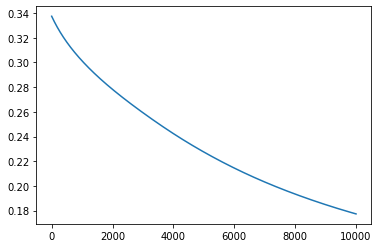

In [55]:
#training loss
plt.plot(cost_list)
plt.show()

In [0]:

#training accuracy
training_accuracy = 0
testing_accuracy = 0

#correct accuracy
correct = 0
test_correct = 0

iter = 0
#real_label[H_[0:,iter:iter+1].argmax()][iter]

H_L = np.zeros((10, 6000))
while iter < 6000:
  #n번째가 label이 1이다.  
  for iter0 in range(0, 10):
    if iter0 == H_[0:,iter:iter+1].argmax():
      H_L[iter0][iter] = 1
  iter += 1

iter = 0
test_H_L = np.zeros((10, 4000))
while iter < 4000:
  #n번째가 label이 1이다.  
  for iter0 in range(0, 10):
    if iter0 == test_H_[0:,iter:iter+1].argmax():
      test_H_L[iter0][iter] = 1
  iter += 1

for i in range(0, 6000):
  for j in range(0, 10):
    if H_L[j][i] == 1 and real_label[j][i] == 1:
      correct += 1


for i in range(0, 4000):
  for j in range(0, 10):
    if test_H[j][i] == 1 and test_real_label == 1:
      test_correct += 1

training_accuracy = (correct / 6000) * 100
testing_accuracy = (test_correct / 4000) * 100


In [9]:
#784개가 있음 그것을 10개로 줄임
#그런게 10000개가 있는데 각각 0~1사이의 값을 가지게 됨
#그 값이 가장 큰 것이 label이고 원래의 label과 비교하면 됨
#6000개가 training 4000개가 testing


#u, v, w : weight


#normalization : 최대값 찾기

train_bias = np.ones((1, 6000))
test_bias = np.ones((1, 4000))


normal_image = list_image / 255


train_data = list_image[0:, 0:6000]
test_data = normal_image[0:, 6000:10000]


#label을 구하는 과정도 필요


#test_initialize
X = np.vstack([test_bias, test_data])
u = np.random.randn(196, 785)
print("X shape : ", X.shape)
Y = np.dot(u, X)

Y_ = 1 / (1 + np.exp(Y))
Y_ = np.vstack([test_bias, Y_])
print("Y_ shape : ", Y.shape)

v = np.random.randn(49, 197)

Z = np.dot(v, Y_)

Z_ = 1 / (1 + np.exp(Z))
Z_ = np.vstack([test_bias, Z_])
print("Z_ shape : ", Z.shape)

w = np.random.randn(10, 50)

H = np.dot(w, Z_)
H_ = 1 / (1 + np.exp(H))
print("H_ shape : ", H.shape)

#i는 어떤 label이 제일 큰지(그래서 어떤 라벨이 되었는지)를 나타낸다

iter = 0
iter0 = 0
#H_L : H의 label list
H_L = np.zeros((10, 4000))


#prediction

#label은 index maximum value
while iter < 4000:
  #n번째가 label이 1이다.  
  for iter0 in range(0, 10):
    if iter0 == H_[0:,iter:iter+1].argmax():
      H_L[iter0][iter] = 1
  iter += 1
print(H_L)
print(H_L.shape)



J_H = np.mean(-1 * H_L * np.log(H_) - (1 -H_L) * np.log(1 - H_))
print(J_H)

learning_rate = 0.0001
"""iter1 = 0
iter2 = 0
#bias는 어차피 1이므로 그냥 곱해도 상관없다

#w
for iter1 in range(0, 10):
  for iter2 in range(0, 50):
    w[iter1][iter2] -= learning_rate * np.mean((H_[iter1] - H_L[iter1]) * (Z_[iter2]))

#v
for iter3 in range(0, 49):
  for iter4 in range(0, 197):
    for iter1 in range(0, 10):
      v[iter3][iter4] -= learning_rate * np.mean( np.mean(w[iter1][iter3] * (H_[iter1] - H_L[iter1])) * Z_[iter3] * (1 - Z[iter3]) * Y_[iter4] )
#u
for
"""
#이래서 normalization이 필요한 거시다!
#w -= learning_rate * H_ - normal_image[6000:] 

#s구했으니 v도 구해야지
#v makes 197 to 49 so 49 * 197 and 
#we need  H and H_L values
#H : 10 * 4000 => use np.sum? because effect all factors

#v -= learning_rate * np.mean(    H_ - list_label[6000:] )

X shape :  (785, 4000)
Y_ shape :  (196, 4000)
Z_ shape :  (49, 4000)
H_ shape :  (10, 4000)
[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 4000)
1.7416012343432377


'iter1 = 0\niter2 = 0\n#bias는 어차피 1이므로 그냥 곱해도 상관없다\n\n#w\nfor iter1 in range(0, 10):\n  for iter2 in range(0, 50):\n    w[iter1][iter2] -= learning_rate * np.mean((H_[iter1] - H_L[iter1]) * (Z_[iter2]))\n\n#v\nfor iter3 in range(0, 49):\n  for iter4 in range(0, 197):\n    for iter1 in range(0, 10):\n      v[iter3][iter4] -= learning_rate * np.mean( np.mean(w[iter1][iter3] * (H_[iter1] - H_L[iter1])) * Z_[iter3] * (1 - Z[iter3]) * Y_[iter4] )\n#u\nfor\n'

In [0]:
#bias 제외하고 생각한 그림
#dot을 이용하기 위해 따로 떼고 생각
#bias는 나중에 계산한다

#이래서 normalization이 필요한 거시다!
#w : (10, 50) H_ : (10, 10000) normal_image : (784, 10000), Z :(50, 10000)
w -= learning_rate * np.dot(H_ - H_L, Z_.T) / 4000
#BIAS제외가 필요
v -= learning_rate * np.dot(np.dot(w.T[1:,], H_ - H_L) * Z_[1:,] * (1 - Z_[1:,]), Y_.T) / 4000
#u / 마찬가지로 bias제외
u -= learning_rate * np.dot( np.dot(v.T[1:,], np.dot(w.T[1:,], H_ - H_L) * Z_[1:,]* (1 - Z_[1:,])) * Y_[1:,] * (1 - Y_[1:,]), X.T )/ 4000

In [0]:
iter = 0
cost_list = []

while iter < 1000:
  Y = np.dot(u, X)

  Y_ = 1 / (1 + np.exp(Y))
  Y_ = np.vstack([test_bias, Y_])
  Z = np.dot(v, Y_)

  Z_ = 1 / (1 + np.exp(Z))
  Z_ = np.vstack([test_bias, Z_])

  H = np.dot(w, Z_)
  H_ = 1 / (1 + np.exp(H))

  J_H = np.mean(-1 * H_L * np.log(H_) - (1 - H_L) * np.log(1 - H_))
  cost_list.append(J_H)
  #동시에 update필요
  #w : (10, 50) H_ : (10, 10000) normal_image : (784, 10000), Z :(50, 10000)
  tmp_w = w - learning_rate * np.dot(H_ - H_L, Z_.T) / 4000
  #BIAS제외가 필요
  tmp_v = v - learning_rate * np.dot(np.dot(w.T[1:,], H_ - H_L) * Z_[1:,] * (1 - Z_[1:,]), Y_.T) / 4000
  #u / 마찬가지로 bias제외
  tmp_u = u - learning_rate * np.dot( np.dot(v.T[1:,], np.dot(w.T[1:,], H_ - H_L) * Z_[1:,]* (1 - Z_[1:,])) * Y_[1:,] * (1 - Y_[1:,]), X.T )/ 4000

  w = tmp_w
  v = tmp_v
  u = tmp_u

  iter += 1

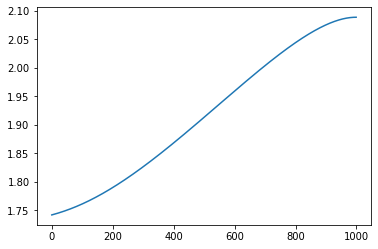

In [11]:

plt.plot(cost_list)
plt.show()

In [0]:
#1. sigmoid function에 대한 def sig():하나 만들고
#2. bias와 구분
#3. normalize
#4. test에 대한 label들 10 * 4000꼴로 만듦